In [1]:
import pandas as pd
from gensim.models import Word2Vec
import gensim.downloader
import io
import numpy as np
import gensim

/root/miniconda3/envs/opence/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
def load_data(filename):
    d = pd.read_csv('../datastories-semeval2017-task4/dataset/Subtask_A/downloaded/'+filename, sep='\t', header=3, 
                   names=['ID', 'sentiment', 'message'], encoding='utf-8')
    d['message'] = d.message.str.replace("\\u002c", ',', regex=False)
    d['message'] = d.message.str.replace("\\u2019", '\'', regex=False)
    d['message'] = d.message.str.replace('\\""', '"', regex=False)
    return d
data_16 = load_data('twitter-2016train-A.tsv')
data_15 = load_data('twitter-2015train-A.tsv')
data_13 = load_data('twitter-2013train-A.tsv')
print(data_13.message.values[0])
data = pd.concat([data_13, data_15, data_16]).reset_index(drop=True)
data

Tehran, Mon Amour: Obama Tried to Establish Ties with the Mullahs http://t.co/TZZzrrKa via @PJMedia_com No Barack Obama - Vote Mitt Romney


ID sentiment  \
0      262682041215234048   neutral   
1      264229576773861376   neutral   
2      264105751826538497  positive   
3      264094586689953794  negative   
4      212392538055778304   neutral   
...                   ...       ...   
16024  639855845958885376  positive   
16025  639979760735662080   neutral   
16026  640196838260363269   neutral   
16027  640975710354567168  positive   
16028  641034340068143104   neutral   

                                                 message  
0      Tehran, Mon Amour: Obama Tried to Establish Ti...  
1      I sat through this whole movie just for Harry ...  
2      with J Davlar 11th. Main rivals are team Polan...  
3      Talking about ACT's && SAT's, deciding where I...  
4      Why is "Happy Valentines Day" trending? It's o...  
...                                                  ...  
16024  @Racalto_SK ok good to know. Punting at MetLif...  
16025  everyone who sat around me at metlife was so a...  
16026  what giants or niners fans would wanna go to t...  
16027  Anybody want a ticket for tomorrow Colombia vs...  
16028  Mendez told me he'd drive me to MetLife on Sun...  

[16029 rows x 3 columns]

In [7]:
def load_data(filename):
    d = pd.read_csv('../datastories-semeval2017-task4/dataset/Subtask_CE/downloaded/'+filename, sep='\t', header=4, 
                   names=['ID', 'topic', 'sentiment', 'message'], encoding='utf-8')
    d['message'] = d.message.str.replace("\\u002c", ',', regex=False)
    d['message'] = d.message.str.replace("\\u2019", '\'', regex=False)
    d['message'] = d.message.str.replace('\\""', '"', regex=False)
    return d
data_0 = load_data('twitter-2016train-CE.tsv')
data_1 = load_data('twitter-2016dev-CE.tsv')
data_2 = load_data('twitter-2016test-CE.tsv')
data = pd.concat([data_0, data_1, data_2]).reset_index(drop=True)
data

ID       topic  sentiment  \
0      629226490152914944  @microsoft          1   
1      629345637155360768  @microsoft         -1   
2      629394528336637953  @microsoft         -1   
3      629650766580609026  @microsoft          1   
4      629797991826722816  @microsoft         -2   
...                   ...         ...        ...   
28447  634711870570500096        zayn          1   
28448  637134671797690368        zayn          1   
28449  636413565780557824        zayn          1   
28450  634633336124776448        zayn          1   
28451  634848746908581892        zayn          2   

                                                 message  
0      Microsoft, I may not prefer your gaming branch...  
1      @MikeWolf1980 @Microsoft I will be downgrading...  
2      @Microsoft 2nd computer with same error!!! #Wi...  
3      Just ordered my 1st ever tablet; @Microsoft Su...  
4      After attempting a reinstall, it still bricks,...  
...                                                  ...  
28447  with Zayn gone I can now definitively say that...  
28448  yo don't ever say that! god forbid! may it not...  
28449  you may call me a bad fan but I sobbed so hard...  
28450  zayn's voice: c'mon guys you can do it, nobody...  
28451  Excited for the 5th album and Zayn's album #MT...  

[28452 rows x 4 columns]

In [3]:
data = data.drop_duplicates(keep='first').reset_index(drop=True)
data

ID sentiment  \
0      262682041215234048   neutral   
1      264229576773861376   neutral   
2      264105751826538497  positive   
3      264094586689953794  negative   
4      212392538055778304   neutral   
...                   ...       ...   
15498  639855845958885376  positive   
15499  639979760735662080   neutral   
15500  640196838260363269   neutral   
15501  640975710354567168  positive   
15502  641034340068143104   neutral   

                                                 message  
0      Tehran, Mon Amour: Obama Tried to Establish Ti...  
1      I sat through this whole movie just for Harry ...  
2      with J Davlar 11th. Main rivals are team Polan...  
3      Talking about ACT's && SAT's, deciding where I...  
4      Why is "Happy Valentines Day" trending? It's o...  
...                                                  ...  
15498  @Racalto_SK ok good to know. Punting at MetLif...  
15499  everyone who sat around me at metlife was so a...  
15500  what giants or niners fans would wanna go to t...  
15501  Anybody want a ticket for tomorrow Colombia vs...  
15502  Mendez told me he'd drive me to MetLife on Sun...  

[15503 rows x 3 columns]

In [5]:
test_16 = load_data('twitter-2016devtest-A.tsv')
test_15 = load_data('twitter-2015test-A.tsv')
test_13 = load_data('twitter-2013test-A.tsv')
data_test = pd.concat([test_13, test_15, test_16]).reset_index(drop=True)
#data_test = load_data('twitter-2016devtest-CE.tsv')
data_test = data_test.drop_duplicates(keep='first').reset_index(drop=True)
data_test

ID sentiment  \
0     171874368908050432   neutral   
1     256010056942903296  positive   
2     253809989599232000   neutral   
3     261776619146985472  positive   
4     264143999374356481  positive   
...                  ...       ...   
7911  639016598477651968   neutral   
7912  640276909633486849   neutral   
7913  640296841725235200   neutral   
7914  641017384908779520   neutral   
7915  641395811474128896   neutral   

                                                message  
0     Excuse the connectivity of this live stream, f...  
1     Show your LOVE for your local field & it might...  
2     Milton on Bolton Wanderers 2 v 2 Leeds United,...  
3     @firecore Can you tell me when an update for t...  
4     @Heavensbasement The Crown, Filthy McNastys, K...  
...                                                 ...  
7911  @YouAreMyArsenal Wouldn't surprise me if we en...  
7912  Rib injury for Zlatan against Russia is a big ...  
7913  Noooooo! I was hoping to see Zlatan being Zlat...  
7914  @Fronsoir Zlatan has never done it on a wet Tu...  
7915  @ZIatanVines  how many goals Zlatan intends to...  

[7916 rows x 3 columns]

In [19]:
data['message'].values[1]

'I sat through this whole movie just for Harry and Ron at christmas. ohlawd'

In [4]:
model = Word2Vec(data.message, min_count=1, vector_size= 50,workers=3, window =3, sg = 1)

In [7]:
model.wv['I']

array([ 0.15851994,  0.19457076, -0.08593333, -0.1382782 , -0.3478218 ,
        0.00873932,  0.30716252,  0.21330011, -0.07648078, -0.12961568,
        0.20148167, -0.03218445, -0.1465323 ,  0.14210686, -0.25294167,
       -0.01414726,  0.0042622 , -0.12410104, -0.25931802,  0.15687367,
       -0.11748452,  0.07529365,  0.1203419 , -0.1592998 , -0.1150403 ,
       -0.18389203, -0.00186655, -0.02658718, -0.22206606, -0.23910658,
        0.21486478, -0.22943217,  0.10405998, -0.5313284 , -0.12922297,
       -0.01748218,  0.46085882,  0.02727354, -0.09721285, -0.34736624,
        0.14530475,  0.23530985, -0.20290476,  0.38377324,  0.3626455 ,
        0.3360473 , -0.28033605,  0.3732643 ,  0.13904086, -0.07763046],
      dtype=float32)

In [5]:
w2v = gensim.downloader.load('word2vec-google-news-300')

In [6]:
w2v.most_similar('twitter')

[('Twitter', 0.8908904194831848),
 ('Twitter.com', 0.7536780834197998),
 ('tweet', 0.7431626319885254),
 ('tweeting', 0.7161932587623596),
 ('tweeted', 0.7137226462364197),
 ('facebook', 0.6988551616668701),
 ('tweets', 0.6974530816078186),
 ('Tweeted', 0.6950210928916931),
 ('Tweet', 0.6875007152557373),
 ('Tweeting', 0.6845167279243469)]

In [127]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

In [129]:
# code from https://github.com/cbaziotis/ekphrasis
text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
        'time', 'url', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated", 'emphasis', 'censored'},
    annotate={},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


In [24]:
test_id = 5
print(data['message'].values[test_id])
" ".join(text_processor.pre_process_doc(data['message'].values[test_id]))

They may have a SuperBowl in Dallas, but Dallas ain't winning a SuperBowl. Not with that quarterback and owner. @S4NYC @RasmussenPoll


"they may have a superbowl in dallas , but dallas ain ' t winning a superbowl . not with that quarterback and owner . <user> <user>"

In [25]:
w2v.most_similar('SuperBowl')

[('Superbowl', 0.7799597382545471),
 ('Super_Bowl', 0.6673995852470398),
 ('superbowl', 0.6268519163131714),
 ('Superbowl_XLIV', 0.6003729104995728),
 ('Super_Bowl_XLIV', 0.5824543237686157),
 ('Super_Bowl_XLI', 0.5759179592132568),
 ('Superbowl_XLIII', 0.5757477283477783),
 ('Superbowl_XLV', 0.5744629502296448),
 ('Superbowl_XLI', 0.5571336150169373),
 ('Super_Bowl_XLIII', 0.5530554056167603)]

In [1]:
import numpy
embeddings_dict = {}
dim = 100
f = open('../datastories-semeval2017-task4/embeddings/datastories.twitter.100d.txt', "r", encoding="utf-8")
for i, line in enumerate(f):
    values = line.split()
    word = values[0]
    coefs = numpy.asarray(values[1:], dtype='float32')
    # if not self.is_ascii(word):
    #     print(word)

    # if word.lower() in {'<unk>', "<unknown>"}:
    #     print(word)
    #     print("UNKNOWN")
    #     print()

    embeddings_dict[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_dict))

Found 658125 word vectors.


In [2]:
def get_embeddings(vectors, dim):
    vocab_size = len(vectors)
    print('Loaded %s word vectors.' % vocab_size)
    wv_map = {}
    pos = 0
    # +1 for zero padding token and +1 for unk
    emb_matrix = numpy.ndarray((vocab_size + 2, dim), dtype='float32')
    for i, (word, vector) in enumerate(vectors.items()):
        pos = i + 1
        wv_map[word] = pos
        emb_matrix[pos] = vector

    # add unknown token
    pos += 1
    wv_map["<unk>"] = pos
    emb_matrix[pos] = numpy.random.uniform(low=-0.05, high=0.05, size=dim)

    return emb_matrix, wv_map
embeddings, word_indices = get_embeddings(embeddings_dict, dim)
word_indices, embeddings

Loaded 658125 word vectors.


({'<pad>': 1,
  '<s>': 2,
  '</s>': 3,
  '<user>': 4,
  '<allcaps>': 5,
  '.': 6,
  '<url>': 7,
  '<hashtag>': 8,
  '</hashtag>': 9,
  'i': 10,
  'the': 11,
  'to': 12,
  ',': 13,
  'you': 14,
  'a': 15,
  '<number>': 16,
  '!': 17,
  '<repeated>': 18,
  'and': 19,
  ':': 20,
  'my': 21,
  'in': 22,
  'is': 23,
  'not': 24,
  'for': 25,
  'of': 26,
  'me': 27,
  '?': 28,
  'it': 29,
  '"': 30,
  '-': 31,
  'on': 32,
  'this': 33,
  'that': 34,
  'so': 35,
  'do': 36,
  'are': 37,
  'have': 38,
  'am': 39,
  'with': 40,
  'be': 41,
  'your': 42,
  'at': 43,
  'just': 44,
  '😂': 45,
  'can': 46,
  'like': 47,
  'love': 48,
  'get': 49,
  'but': 50,
  'all': 51,
  'will': 52,
  'we': 53,
  '<elongated>': 54,
  'one': 55,
  'from': 56,
  'up': 57,
  'was': 58,
  'what': 59,
  '/': 60,
  'if': 61,
  'now': 62,
  "'": 63,
  'out': 64,
  'new': 65,
  '&': 66,
  'no': 67,
  '(': 68,
  'by': 69,
  'when': 70,
  ')': 71,
  "it's": 72,
  'follow': 73,
  'they': 74,
  'u': 75,
  'day': 76,
  'how'

In [6]:
def load_vec(emb_path, nmax=50000):
    vectors = []
    word2id = {}
    with io.open(emb_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        next(f)
        for i, line in enumerate(f):
            word, vect = line.rstrip().split(' ', 1)
            vect = np.fromstring(vect, sep=' ')
            assert word not in word2id, 'word found twice'
            vectors.append(vect)
            word2id[word] = len(word2id)
            if len(word2id) == nmax:
                break
    id2word = {v: k for k, v in word2id.items()}
    embeddings = np.vstack(vectors)
    return embeddings, id2word, word2id
en_embeddings, en_id2word, en_word2id = load_vec('data/embeddings/wiki.multi.en.vec')
de_embeddings, de_id2word, de_word2id = load_vec('data/embeddings/wiki.multi.de.vec')

In [104]:
embeddings = en_embeddings
word_indices = en_word2id

In [116]:
embeddings = np.concatenate([de_embeddings, en_embeddings])
word_indices = de_word2id.copy()
num_en = len(word_indices)
for k,v in en_word2id.items():
    word_indices[k] = num_en + v
index_words = de_id2word.copy()
print(index_words[0])
for k,v in en_id2word.items():
    index_words[k + num_en] = v
embeddings.shape, word_indices

.


((100000, 300),
 {'.': 50001,
  ',': 50000,
  '</s>': 50003,
  '-': 50005,
  'der': 51709,
  ')': 50009,
  'die': 51780,
  '(': 50010,
  'und': 53021,
  'in': 50006,
  'von': 51482,
  "'": 50008,
  'den': 54648,
  'im': 55272,
  'das': 55238,
  'des': 51624,
  'mit': 55999,
  'ist': 57165,
  'er': 56064,
  'zu': 60734,
  'für': 57147,
  'auf': 63282,
  'ein': 60720,
  'als': 66542,
  'dem': 62049,
  'eine': 67161,
  'wurde': 26,
  '–': 50033,
  'auch': 90928,
  'sich': 81690,
  'nicht': 77784,
  'an': 50029,
  'es': 54734,
  'nach': 71064,
  'war': 50140,
  'bei': 63415,
  'aus': 58478,
  'rd': 50045,
  'am': 50458,
  'sie': 82489,
  'cest': 59133,
  'bis': 64027,
  '"': 50213,
  'ich': 65971,
  'einer': 76076,
  'zum': 68666,
  'werden': 46,
  'sind': 79972,
  'oder': 68990,
  'wird': 49,
  'durch': 84033,
  'cet': 58109,
  'score': 50070,
  'zur': 60805,
  'einen': 54,
  'dass': 88200,
  'über': 66573,
  'einem': 91136,
  'um': 60004,
  'aber': 59,
  '?': 50056,
  'wie': 77803,
  'nu

In [125]:
embeddings_dict = {word: embeddings[index] for word, index in word_indices.items()}
embeddings_dict

{'.': array([-4.69256e-02, -5.85261e-04, -7.50844e-02,  2.72415e-02,
        -1.01507e-01,  1.31279e-02, -1.27297e-02, -1.55756e-01,
        -1.85198e-02,  1.04861e-01,  3.32065e-02, -6.78715e-02,
         4.44594e-02, -4.06334e-02, -3.28302e-02, -1.19350e-01,
        -5.49535e-02,  2.36837e-03,  8.19509e-02,  8.14484e-02,
        -4.62626e-02,  9.71621e-02, -8.40835e-02,  7.95438e-02,
        -9.23183e-02,  7.39231e-04, -3.92808e-02, -1.05844e-01,
         1.44945e-02,  7.19889e-02, -3.98682e-02,  6.08952e-02,
        -7.82643e-02,  7.11570e-02, -7.00253e-02, -2.60608e-02,
        -4.36908e-03, -3.32842e-02,  8.69763e-02, -5.18834e-02,
        -2.70418e-02, -1.73070e-02, -8.98310e-02,  4.12314e-02,
        -2.47335e-02, -1.89480e-02,  1.19113e-02, -5.32896e-02,
         5.09417e-03, -8.09839e-02, -1.89290e-02, -3.45291e-02,
        -3.11330e-02,  1.57310e-02, -3.19362e-02,  3.61524e-03,
         2.64408e-02,  9.35134e-02, -4.54603e-02,  6.82854e-02,
         2.75181e-02, -1.61165e-01,

In [117]:
embeddings[word_indices['(']] - en_embeddings[en_word2id['(']]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [4]:
def get_nn(word, src_emb, src_id2word, tgt_emb, tgt_id2word, K=5):
    print("Nearest neighbors of \"%s\":" % word)
    word2id = {v: k for k, v in src_id2word.items()}
    word_emb = src_emb[word_indices[word]]
    scores = (tgt_emb / np.linalg.norm(tgt_emb, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
    k_best = scores.argsort()[-K:][::-1]
    for i, idx in enumerate(k_best):
        print('%.4f - %s' % (scores[idx], tgt_id2word[idx]))
src_word = 'dog'
get_nn(src_word, embeddings, index_words, embeddings, index_words, K=5)

Nearest neighbors of "dog":


AttributeError: 'list' object has no attribute 'items'

In [2]:
m = gensim.models.KeyedVectors.load('data/embeddings/anchor_embedding_en_orig')
embeddings = m.vectors
word_indices = m.key_to_index
embeddings_dict = {word: embeddings[index] for word, index in word_indices.items()}
embeddings_dict

{'hamburg': array([ 1.842220e-01,  7.342610e-01, -7.014370e-01,  4.050120e-01,
         4.505050e-01, -5.138630e-01, -1.190398e+00, -5.067130e-01,
         3.153500e-01,  8.540000e-04,  7.260030e-01,  3.399950e-01,
        -3.667480e-01, -7.872440e-01, -2.275830e-01,  6.486400e-02,
        -2.600060e-01, -5.442380e-01, -8.253690e-01, -1.276420e-01,
         2.909600e-02,  1.643380e-01, -2.015510e-01, -4.497940e-01,
         1.063170e-01, -7.743500e-02,  6.143410e-01,  2.796110e-01,
        -7.465020e-01, -3.736890e-01, -3.448810e-01,  7.580800e-02,
         1.930890e-01,  3.372430e-01, -2.750300e-02,  1.194450e-01,
         2.935270e-01, -1.064530e-01,  3.778740e-01,  7.972330e-01,
         1.964470e-01,  6.831270e-01, -3.356210e-01, -1.737300e-02,
        -2.493600e-02, -7.332010e-01,  2.648980e-01, -5.774350e-01,
         6.141600e-01,  5.395740e-01, -1.651790e-01,  9.007700e-02,
         6.870250e-01,  8.522000e-03, -3.018180e-01,  1.209000e-02,
         7.971180e-01,  4.785770e-01,

In [5]:
word_indices['<pad>']

2362

## Represent posts as concatenated work vectors

In [126]:
from tqdm import tqdm
import numpy as np

In [135]:
preprocessed = []
vectors = []
unknown = 0
dim = embeddings.shape[1]
for _, row in tqdm(data.iterrows(), total=data.shape[0]):
    ekphrased = text_processor.pre_process_doc(row.message)
    preprocessed.append(ekphrased)
    vec = np.zeros([dim])
    for word in ekphrased:
        if word in embeddings_dict:
            vec += embeddings_dict[word]
        else:
            unknown += 1
    vectors.append(vec)
print(unknown, 'words could not be assigned to vector')

100%|██████████| 14978/14978 [00:12<00:00, 1182.24it/s]

37188 words could not be assigned to vector


In [136]:
data['preprocessed'] = preprocessed
#data_balanced['sentiment'] = data_balanced.sentiment.apply(lambda x: x+2)
data

ID sentiment  \
0      262682041215234048   neutral   
1      264229576773861376   neutral   
2      264105751826538497  positive   
3      212392538055778304   neutral   
4      254941790757601280  negative   
...                   ...       ...   
14973  639855845958885376  positive   
14974  639979760735662080   neutral   
14975  640196838260363269   neutral   
14976  640975710354567168  positive   
14977  641034340068143104   neutral   

                                                 message  \
0      Tehran, Mon Amour: Obama Tried to Establish Ti...   
1      I sat through this whole movie just for Harry ...   
2      with J Davlar 11th. Main rivals are team Polan...   
3      Why is "Happy Valentines Day" trending? It's o...   
4      They may have a SuperBowl in Dallas, but Dalla...   
...                                                  ...   
14973  @Racalto_SK ok good to know. Punting at MetLif...   
14974  everyone who sat around me at metlife was so a...   
14975  what giants or niners fans would wanna go to t...   
14976  Anybody want a ticket for tomorrow Colombia vs...   
14977  Mendez told me he'd drive me to MetLife on Sun...   

                                            preprocessed  
0      [tehran, ,, mon, amour, :, obama, tried, to, e...  
1      [i, sat, through, this, whole, movie, just, fo...  
2      [with, j, davlar, 1, 1, th, ., main, rivals, a...  
3      [why, is, ", happy, valentines, day, ", trendi...  
4      [they, may, have, a, superbowl, in, dallas, ,,...  
...                                                  ...  
14973  [<user>, ok, good, to, know, ., punting, at, m...  
14974  [everyone, who, sat, around, me, at, metlife, ...  
14975  [what, giants, or, niners, fans, would, wanna,...  
14976  [anybody, want, a, ticket, for, tomorrow, colo...  
14977  [mendez, told, me, he, ', d, drive, me, to, me...  

[14978 rows x 4 columns]

In [27]:
data_test.to_csv('data/SemEval2017/test_data_5_classes.csv', index=False)
#data_test.to_csv('data/SemEval2017/test_data.csv', index=False)

In [137]:
#np.savetxt('data/SemEval2017/test_data_5_classes_vectorized.csv', vectors)
#X_test_vector = vectors
X_train_vector = vectors

## Try a simple classifier

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
import ast

In [32]:
data = pd.read_csv('data/SemEval2017/train_data.csv')
data['preprocessed'] = data.preprocessed.apply(lambda x: ast.literal_eval(x))
data_test = pd.read_csv('data/SemEval2017/test_data.csv')
data_test['preprocessed'] = data_test.preprocessed.apply(lambda x: ast.literal_eval(x))
X_train_vector = np.loadtxt('data/SemEval2017/train_data_vectorized.csv')
X_test_vector = np.loadtxt('data/SemEval2017/test_data_vectorized.csv')
data

ID       topic  sentiment  \
0      629226490152914944  @microsoft          3   
1      629345637155360768  @microsoft          1   
2      629394528336637953  @microsoft          1   
3      629650766580609026  @microsoft          3   
4      629797991826722816  @microsoft          0   
...                   ...         ...        ...   
28447  634711870570500096        zayn          3   
28448  637134671797690368        zayn          3   
28449  636413565780557824        zayn          3   
28450  634633336124776448        zayn          3   
28451  634848746908581892        zayn          4   

                                                 message  \
0      Microsoft, I may not prefer your gaming branch...   
1      @MikeWolf1980 @Microsoft I will be downgrading...   
2      @Microsoft 2nd computer with same error!!! #Wi...   
3      Just ordered my 1st ever tablet; @Microsoft Su...   
4      After attempting a reinstall, it still bricks,...   
...                                                  ...   
28447  with Zayn gone I can now definitively say that...   
28448  yo don't ever say that! god forbid! may it not...   
28449  you may call me a bad fan but I sobbed so hard...   
28450  zayn's voice: c'mon guys you can do it, nobody...   
28451  Excited for the 5th album and Zayn's album #MT...   

                                            preprocessed  
0      [microsoft, ,, i, may, not, prefer, your, gami...  
1      [<user>, <user>, i, will, be, downgrading, and...  
2      [<user>, 2, nd, computer, with, same, error, !...  
3      [just, ordered, my, 1, st, ever, tablet, ;, <u...  
4      [after, attempting, a, reinstall, ,, it, still...  
...                                                  ...  
28447  [with, zayn, gone, i, can, now, definitively, ...  
28448  [yo, do, not, ever, say, that, !, god, forbid,...  
28449  [you, may, call, me, a, bad, fan, but, i, sobb...  
28450  [zayn, ', s, voice, :, c, ', mon, guys, you, c...  
28451  [excited, for, the, 5, th, album, and, zayn, '...  

[28452 rows x 5 columns]

In [56]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [57]:
clf.fit(np.stack(X_train_vector), data.sentiment)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [58]:
print('Training accuracy', clf.score(X_train_vector, data.sentiment))
print('Test accuracy', clf.score(X_test_vector, data_test.sentiment))

Training accuracy 0.7251969555347844
Test accuracy 0.6255216896420893


## Build Datastories' network in TensorFlow

In [6]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Bidirectional, Attention, Dense, Activation, Flatten, GaussianNoise
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Recall
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import tensorflow.keras.backend as K
import time
import pandas as pd
import ast
import numpy as np

In [7]:
data = pd.read_csv('data/SemEval2017/train_data.csv')
data['preprocessed'] = data.preprocessed.apply(lambda x: ast.literal_eval(x))
data_test = pd.read_csv('data/SemEval2017/test_data.csv')
data_test['preprocessed'] = data_test.preprocessed.apply(lambda x: ast.literal_eval(x))
X_train_vector = np.loadtxt('data/SemEval2017/train_data_vectorized.csv')
X_test_vector = np.loadtxt('data/SemEval2017/test_data_vectorized.csv')
data

ID sentiment  \
0      262682041215234048   neutral   
1      264229576773861376   neutral   
2      264105751826538497  positive   
3      212392538055778304   neutral   
4      254941790757601280  negative   
...                   ...       ...   
14973  639855845958885376  positive   
14974  639979760735662080   neutral   
14975  640196838260363269   neutral   
14976  640975710354567168  positive   
14977  641034340068143104   neutral   

                                                 message  \
0      Tehran, Mon Amour: Obama Tried to Establish Ti...   
1      I sat through this whole movie just for Harry ...   
2      with J Davlar 11th. Main rivals are team Polan...   
3      Why is "Happy Valentines Day" trending? It's o...   
4      They may have a SuperBowl in Dallas, but Dalla...   
...                                                  ...   
14973  @Racalto_SK ok good to know. Punting at MetLif...   
14974  everyone who sat around me at metlife was so a...   
14975  what giants or niners fans would wanna go to t...   
14976  Anybody want a ticket for tomorrow Colombia vs...   
14977  Mendez told me he'd drive me to MetLife on Sun...   

                                            preprocessed  
0      [tehran, ,, mon, amour, :, obama, tried, to, e...  
1      [i, sat, through, this, whole, movie, just, fo...  
2      [with, j, davlar, 1, 1, th, ., main, rivals, a...  
3      [why, is, ", happy, valentines, day, ", trendi...  
4      [they, may, have, a, superbowl, in, dallas, ,,...  
...                                                  ...  
14973  [<user>, ok, good, to, know, ., punting, at, m...  
14974  [everyone, who, sat, around, me, at, metlife, ...  
14975  [what, giants, or, niners, fans, would, wanna,...  
14976  [anybody, want, a, ticket, for, tomorrow, colo...  
14977  [mendez, told, me, he, ', d, drive, me, to, me...  

[14978 rows x 4 columns]

In [8]:
print(len(data))
data.sentiment.value_counts()

14978


positive    6458
neutral     6291
negative    2229
Name: sentiment, dtype: int64

In [63]:
few = data[(data.sentiment == 0) | (data.sentiment == 4) | (data.sentiment == 1)]
print(len(few))
data_balanced = pd.concat([few, data[data.sentiment == 2].sample(3151), data[data.sentiment == 3].sample(3151)])
print(data_balanced.sentiment.value_counts())
data_balanced

4281
1    3151
2    3151
3    3151
4     863
0     267
Name: sentiment, dtype: int64


ID          topic  sentiment  \
1      629345637155360768     @microsoft          1   
2      629394528336637953     @microsoft          1   
4      629797991826722816     @microsoft          0   
6      630542330827771904     @microsoft          1   
7      630636736746422272     @microsoft          1   
...                   ...            ...        ...   
2600   635515646097256448        federer          3   
2043   639376556901711872  david cameron          3   
26629  640910925986332672      tom brady          3   
23619  638483820388438016    real madrid          3   
2629   639579527258210305        federer          3   

                                                 message  \
1      @MikeWolf1980 @Microsoft I will be downgrading...   
2      @Microsoft 2nd computer with same error!!! #Wi...   
4      After attempting a reinstall, it still bricks,...   
6      Did @Microsoft break Windows 10? Was working f...   
7      @MSAU @Microsoft spent over 40 mins &amp; gave...   
...                                                  ...   
2600   Federer breaks early in the 2nd set! Even cons...   
2043   @jblresearch Nice one david cameron, great new...   
26629  @DPSass @Jared_Carrabis @MattyinMaine @NFL Tom...   
23619  Imagine being De Gea going to sleep then wakin...   
2629   @camerondallas Federer is about to begin his 2...   

                                            preprocessed  
1      [<user>, <user>, i, will, be, downgrading, and...  
2      [<user>, 2, nd, computer, with, same, error, !...  
4      [after, attempting, a, reinstall, ,, it, still...  
6      [did, <user>, break, windows, <number>, ?, was...  
7      [<user>, <user>, spent, over, <number>, mins, ...  
...                                                  ...  
2600   [federer, breaks, early, in, the, 2, nd, set, ...  
2043   [<user>, nice, one, david, cameron, ,, great, ...  
26629  [<user>, <user>, <user>, <user>, tom, brady, i...  
23619  [imagine, being, de, gea, going, to, sleep, th...  
2629   [<user>, federer, is, about, to, begin, his, 2...  

[10583 rows x 5 columns]

In [9]:
# https://stackoverflow.com/questions/62948332/how-to-add-attention-layer-to-a-bi-lstm/62949137#62949137
class Attention(tf.keras.layers.Layer):

    def __init__(self, return_sequences=True, name=None, **kwargs):
        super(Attention, self).__init__(name=name)
        self.return_sequences = return_sequences
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
    
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                           initializer="glorot_uniform", trainable=True)
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                           initializer="glorot_uniform", trainable=True)
    
        super(Attention, self).build(input_shape)

    def call(self, x):
    
        e = tf.keras.activations.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        a = tf.keras.activations.softmax(e, axis=1)
        output = x * a
    
#         if self.return_sequences:
#             return a, output
    
#         return a, tf.keras.backend.sum(output, axis=1)
        if self.return_sequences:
            return output
        return tf.keras.backend.sum(output, axis=1)

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'return_sequences': self.return_sequences 
        })
        return config

In [25]:
max_length = max(data.preprocessed.apply(lambda x: len(x)))
def embeddings_layer(max_length, embeddings, samples, trainable=False, masking=False,
                     scale=False, normalize=False):
    if scale:
        print("Scaling embedding weights...")
        embeddings = preprocessing.scale(embeddings)
    if normalize:
        print("Normalizing embedding weights...")
        embeddings = preprocessing.normalize(embeddings)

    vocab_size = embeddings.shape[0]
    embedding_size = embeddings.shape[1]

    _embedding = Embedding(
        input_dim=vocab_size,
        output_dim=embedding_size,
        input_length=max_length if max_length > 0 else None,
        #input_shape=(max_length),
        trainable=trainable,
        mask_zero=masking if max_length > 0 else False,
        weights=[embeddings]
    )

    return _embedding
emb_layer = embeddings_layer(max_length, embeddings, len(data))
emb_layer

In [26]:
model = Sequential()
model.add(emb_layer)
model.add (GaussianNoise(0.3))
model.add(Dropout(0.3))

In [27]:
layers = 2
for i in range(layers):
    rs = (layers > 1 and i < layers - 1)
    rnn = LSTM(64, return_sequences=True, dropout=0.3)
    model.add(Bidirectional(rnn))
    model.add(Dropout(0.3))

In [28]:
model.add(Attention(name='attention_weight'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(len(data.sentiment.unique()), activity_regularizer=L2(0.0001)))
model.add(Activation('softmax'))

In [102]:
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

model.compile(optimizer=Adam(clipnorm=1, lr=0.005), loss='categorical_crossentropy', 
              metrics=['accuracy', f1_metric, Recall(class_id=0, name='recall_0'), 
                      Recall(class_id=1, name='recall_1'), Recall(class_id=2, name='recall_2')])
                      #Recall(class_id=3, name='recall_3'), Recall(class_id=4, name='recall_4')])

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 1396)]       0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 1396, 100)    65877800    input_11[0][0]                   
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 35)]         0                                            
__________________________________________________________________________________________________
gaussian_noise_12 (GaussianNois (None, 1396, 100)    0           embedding_12[0][0]               
____________________________________________________________________________________________

In [15]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, min_delta=0.01)

In [13]:
model.load_weights('data/SemEval2017/model_datastories_imitation_with_attention1631884436.h5')

In [39]:
config = model.get_config() # Returns pretty much every information about your model
print(config["layers"][0]["config"]["batch_input_shape"]) 

(None, 1332)


In [54]:
## use to project 5 class data to 3 classes
to_3_class = {0: 'negative', 1: 'negative', 2: 'neutral', 3: 'positive', 4: 'positive'}
to_3_class_num = {0: 2, 1: 2, 2: 1, 3: 0, 4: 0}
sentiment_id = {'positive': 0, 'neutral': 1, 'negative': 2}
data['sentiment'] = data.sentiment.apply(lambda x: to_3_class_num[x])
data

ID       topic  sentiment  \
0      629226490152914944  @microsoft          0   
1      629345637155360768  @microsoft          2   
2      629394528336637953  @microsoft          2   
3      629650766580609026  @microsoft          0   
4      629797991826722816  @microsoft          2   
...                   ...         ...        ...   
28447  634711870570500096        zayn          0   
28448  637134671797690368        zayn          0   
28449  636413565780557824        zayn          0   
28450  634633336124776448        zayn          0   
28451  634848746908581892        zayn          0   

                                                 message topic_preprocessed  \
0      Microsoft, I may not prefer your gaming branch...         ['<user>']   
1      @MikeWolf1980 @Microsoft I will be downgrading...         ['<user>']   
2      @Microsoft 2nd computer with same error!!! #Wi...         ['<user>']   
3      Just ordered my 1st ever tablet; @Microsoft Su...         ['<user>']   
4      After attempting a reinstall, it still bricks,...         ['<user>']   
...                                                  ...                ...   
28447  with Zayn gone I can now definitively say that...           ['zayn']   
28448  yo don't ever say that! god forbid! may it not...           ['zayn']   
28449  you may call me a bad fan but I sobbed so hard...           ['zayn']   
28450  zayn's voice: c'mon guys you can do it, nobody...           ['zayn']   
28451  Excited for the 5th album and Zayn's album #MT...           ['zayn']   

                                            preprocessed  
0      [microsoft, ,, i, may, not, prefer, your, gami...  
1      [<user>, <user>, i, will, be, downgrading, and...  
2      [<user>, 2, nd, computer, with, same, error, !...  
3      [just, ordered, my, 1, st, ever, tablet, ;, <u...  
4      [after, attempting, a, reinstall, ,, it, still...  
...                                                  ...  
28447  [with, zayn, gone, i, can, now, definitively, ...  
28448  [yo, do, not, ever, say, that, !, god, forbid,...  
28449  [you, may, call, me, a, bad, fan, but, i, sobb...  
28450  [zayn, ', s, voice, :, c, ', mon, guys, you, c...  
28451  [excited, for, the, 5, th, album, and, zayn, '...  

[28452 rows x 6 columns]

In [16]:
sentiment_id = {'positive': 0, 'neutral': 1, 'negative': 2}
y_train = to_categorical(data.sentiment.apply(lambda x: sentiment_id[x]))
#y_test = to_categorical(data_test.sentiment.apply(lambda x: sentiment_id[x]))
#y_train = to_categorical(data.sentiment, num_classes=5)
y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [17]:
def padded_index_vector(df):
    #X = df.preprocessed.apply(lambda x: [word_indices[word] if word in word_indices else word_indices['<unk>'] for word in x ]).values
    X = df.preprocessed.apply(lambda x: [word_indices[word] if word in word_indices else 0 for word in x ]).values
    X = [np.pad(np.array(x), (0, max_length -len(x)), 'constant', constant_values=(0,0)) for x in X]
    X = np.stack(X)
    return X
X_train = padded_index_vector(data)
#X_test = padded_index_vector(data_test)
X_train

array([[22639,  2372,  5968, ...,     0,     0,     0],
       [ 2371,  3702,   965, ...,     0,     0,     0],
       [   41,  3111,     0, ...,     0,     0,     0],
       ...,
       [  493,  4080,   162, ...,     0,     0,     0],
       [ 3574,  1918,  2373, ...,     0,     0,     0],
       [41785,  2663,   472, ...,     0,     0,     0]])

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [101]:
#data['sentiment'] = data.sentiment.apply(lambda x: x+2)
classes = sorted(data.sentiment.unique())
print(classes, data.sentiment.value_counts())
class_weights = compute_class_weight('balanced', classes, data.sentiment)
print(class_weights)
class_weights = {i: x for i,x in zip(classes, class_weights)}
#class_weights = {sentiment_id[i]: x for i,x in zip(data.sentiment.unique(), class_weights)}
# class_weights = {0: 11.312359550561798,
#                  1: 1.671723262456363,
#                  2: 0.671723262456363,
#                  3: 0.671723262456363,
#                  4: 3.593742757821553}
class_weights = {0: 0.7487171390226574, 1: 1.7668795989326433, 2: 2.774722059684026}
class_weights

[0, 1, 2] 0    12667
1    12367
2     3418
Name: sentiment, dtype: int64
[0.74871714 0.7668796  2.77472206]


{0: 0.7487171390226574, 1: 1.7668795989326433, 2: 2.774722059684026}

In [33]:
#pred = model.predict(np.expand_dims(X_train[0], axis=0))
pred = model.predict(X_train[0:2], batch_size=2)
pred.shape, pred

((2, 3),
 array([[0.96193093, 0.03162033, 0.00644876],
        [0.43575755, 0.30300894, 0.26123354]], dtype=float32))

In [31]:
print('Initial loss')
eval0 = model.evaluate(X_val, y_val)
eval0

Initial loss
47/47 [==============================] - 8s 100ms/step - loss: 1.0986 - accuracy: 0.3934 - f1_metric: 0.0000e+00 - recall_0: 0.0000e+00 - recall_1: 0.0000e+00 - recall_2: 0.0000e+00


[1.0985716581344604, 0.41588786244392395, 0.0, 0.0, 0.0, 0.0]

In [ ]:
epochs = 15
val_freq = 5
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), validation_freq=val_freq, epochs=epochs,
                    batch_size=50, use_multiprocessing=True, workers=20, shuffle=True,# class_weight=class_weights,
                   callbacks=[early_stop])

Epoch 1/15
270/270 [==============================] - 86s 295ms/step - loss: 0.9855 - accuracy: 0.4451 - f1_metric: 0.1043 - recall_0: 0.1478 - recall_1: 0.0243 - recall_2: 0.0075
Epoch 2/15
270/270 [==============================] - 80s 295ms/step - loss: 0.9290 - accuracy: 0.5100 - f1_metric: 0.3772 - recall_0: 0.4914 - recall_1: 0.1611 - recall_2: 0.0707
Epoch 3/15
 75/270 [=======>......................] - ETA: 58s - loss: 0.8842 - accuracy: 0.5592 - f1_metric: 0.5046 - recall_0: 0.5415 - recall_1: 0.4191 - recall_2: 0.1160

In [106]:
history = history.history
history

{'loss': [1.278936505317688,
  1.1996437311172485,
  1.1748607158660889,
  1.162440299987793,
  1.1522847414016724,
  1.1469237804412842,
  1.1387947797775269,
  1.1357656717300415,
  1.1377429962158203,
  1.129564642906189,
  1.1281886100769043,
  1.1260101795196533,
  1.129416584968567,
  1.1222121715545654,
  1.125221610069275],
 'accuracy': [0.5171834826469421,
  0.5515894889831543,
  0.5622900724411011,
  0.5729907155036926,
  0.5777942538261414,
  0.5795125961303711,
  0.577403724193573,
  0.5858002305030823,
  0.5830274224281311,
  0.5860345363616943,
  0.5890806913375854,
  0.5888854265213013,
  0.5861126184463501,
  0.5947043895721436,
  0.5967351198196411],
 'f1_metric': [0.4636096954345703,
  0.5214860439300537,
  0.5354278087615967,
  0.5475854873657227,
  0.5564692616462708,
  0.5592033863067627,
  0.5561297535896301,
  0.5672020316123962,
  0.5608514547348022,
  0.5658780932426453,
  0.5669977068901062,
  0.5723075270652771,
  0.5676347613334656,
  0.5736219882965088,
  0

In [40]:
# use this if the model stopped early to run a final validation
eval_end = model.evaluate(X_val, y_val)
for i, key in enumerate({k: v for k,v in history.items() if 'val' in k}):
    history[key].insert(-1, eval_end[i])
eval_end

47/47 [==============================] - 5s 100ms/step - loss: 0.7759 - accuracy: 0.6455 - f1_metric: 0.6091 - recall_0: 0.6672 - recall_1: 0.4639 - recall_2: 0.3319


[0.7758596539497375,
 0.6455273628234863,
 0.6090781092643738,
 0.667187511920929,
 0.4638844430446625,
 0.33191490173339844]

In [107]:
#val0 = 1.0986042022705078
#acc0 = 0.4459279179573059
#history['val_loss'].insert(0, eval0[0])
#history['val_accuracy'].insert(0, eval0[1])
for i, key in enumerate({k: v for k,v in history.items() if 'val' in k}):
    history[key].insert(0, eval0[i])

In [37]:
history['val_loss']

[1.0986082553863525,
 0.7630043029785156,
 0.7483793497085571,
 0.7542850971221924]

In [108]:
savename = 'data/SemEval2017/model_datastories_target_3_class_multilingual'

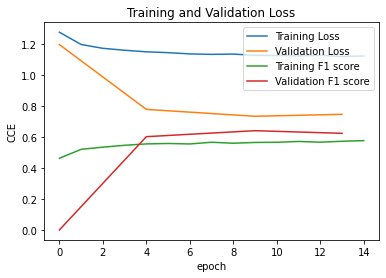

In [109]:
#plt.subplot(2, 1, 2)
val_epochs = range(0, epochs, val_freq)
val_epochs = [0, 4, 9, 13]
timestamp = str(int(time.time()))
plt.plot(history['loss'], label='Training Loss')
plt.plot(val_epochs, history['val_loss'], label='Validation Loss')
plt.plot(history['f1_metric'], label='Training F1 score')
plt.plot(val_epochs, history['val_f1_metric'], label='Validation F1 score')
plt.legend(loc='upper right')
plt.ylabel('CCE')
#plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.savefig(savename+'.png')

9 3


Text(0.5, 0, 'epoch')

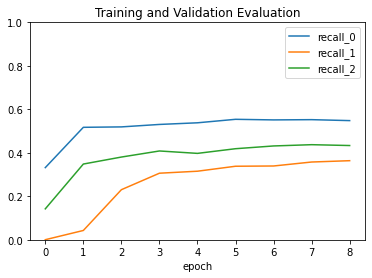

In [17]:
plot_val = False
epochs = len(history['loss'])
val_freq = int(len(history['loss'])/len(history['val_loss']))
print(len(history['loss']), len(history['val_loss']))
for key in {k: v for k,v in history.items() if 'recall' in k}:
    if plot_val and 'val' in key:
        plt.plot(range(0, epochs, val_freq), history[key], label=key)
    elif not plot_val and not 'val' in key:
        plt.plot(history[key], label=key)
    else :
        pass
plt.legend(loc='upper right')
#plt.ylabel('CCE')
plt.ylim([0, 1.0])
plt.title('Training and Validation Evaluation')
plt.xlabel('epoch')

In [ ]:
model.evaluate(X_test, y_test)

In [110]:
import pickle
with open(savename + '_history.pkl', 'wb') as f:
    pickle.dump(history, f)

In [20]:
import pickle
with open('data/SemEval2017/model_datastories_target_5_class_history.pkl', 'rb') as f:
    history = pickle.load(f)
history

{'loss': [1.3048847913742065,
  1.2033904790878296,
  1.1756410598754883,
  1.1482231616973877,
  1.126383662223816,
  1.1232160329818726,
  1.1098346710205078,
  1.1153860092163086,
  1.1084264516830444,
  1.092918872833252,
  1.1019833087921143,
  1.0947332382202148,
  1.0879541635513306,
  1.0872528553009033,
  1.0833815336227417],
 'accuracy': [0.467546671628952,
  0.5132390856742859,
  0.5127313733100891,
  0.5232757925987244,
  0.5234320163726807,
  0.5348746180534363,
  0.5303053855895996,
  0.5338592529296875,
  0.5378817319869995,
  0.5408498048782349,
  0.5331172347068787,
  0.5356166362762451,
  0.5379598736763,
  0.5377646088600159,
  0.5358119010925293],
 'f1_metric': [0.18942761421203613,
  0.2926108241081238,
  0.322172075510025,
  0.3456049859523773,
  0.3598794937133789,
  0.3748997151851654,
  0.38017046451568604,
  0.39115700125694275,
  0.3973032236099243,
  0.40657106041908264,
  0.40057772397994995,
  0.4054235517978668,
  0.4145583212375641,
  0.40655529499053955

In [111]:
#model.save('data/SemEval2017/model_datastories_imitation_with_attention_5_class_'+timestamp+'.h5', save_format='h5')
model.save(savename)

INFO:tensorflow:Assets written to: data/SemEval2017/model_datastories_target_3_class_multilingual/assets


INFO:tensorflow:Assets written to: data/SemEval2017/model_datastories_target_3_class_multilingual/assets


## Topic level 5 class prediction

In [44]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer, Embedding, concatenate, Dropout, RepeatVector, LSTM, Bidirectional, Attention, Input, Dense, Activation, Flatten, GaussianNoise
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Recall
from tensorflow.keras import backend as K, regularizers, constraints, initializers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import time
import pandas as pd
import ast
import numpy as np

In [45]:
class MeanOverTime(Layer):
    """
    Layer that computes the mean of timesteps returned from an RNN and supports masking
    Example:
        activations = LSTM(64, return_sequences=True)(words)
        mean = MeanOverTime()(activations)
    """

    def __init__(self, **kwargs):
        self.supports_masking = True
        super(MeanOverTime, self).__init__(**kwargs)

    def call(self, x, mask=None):
        if mask is not None:
            mask = K.cast(mask, 'float32')
            return K.cast(K.sum(x, axis=1) / K.sum(mask, axis=1, keepdims=True),
                          K.floatx())
        else:
            return K.mean(x, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]

    def compute_mask(self, input, input_mask=None):
        return None

In [46]:
def dot_product(x, kernel):
    """
    Wrapper for dot product operation, in order to be compatible with both
    Theano and Tensorflow
    Args:
        x (): input
        kernel (): weights
    Returns:
    """
    if K.backend() == 'tensorflow':
        # todo: check that this is correct
        return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
    else:
        return K.dot(x, kernel)

class AttentionWithContext(Layer):
    """
        Attention operation, with a context/query vector, for temporal data.
        Supports Masking.
        Follows the work of Yang et al. [https://www.cs.cmu.edu/~diyiy/docs/naacl16.pdf]
        "Hierarchical Attention Networks for Document Classification"
        by using a context vector to assist the attention
        # Input shape
            3D tensor with shape: `(samples, steps, features)`.
        # Output shape
            2D tensor with shape: `(samples, features)`.
        :param kwargs:
        Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
        The dimensions are inferred based on the output shape of the RNN.
        Example:
            model.add(LSTM(64, return_sequences=True))
            model.add(AttentionWithContext())
        """

    def __init__(self,
                 W_regularizer=None, u_regularizer=None, b_regularizer=None,
                 W_constraint=None, u_constraint=None, b_constraint=None,
                 bias=True,
                 return_attention=False, **kwargs):

        self.supports_masking = True
        self.return_attention = return_attention
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        super(AttentionWithContext, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight(shape=(input_shape[-1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)

        self.u = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_u'.format(self.name),
                                 regularizer=self.u_regularizer,
                                 constraint=self.u_constraint)

        super(AttentionWithContext, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        uit = dot_product(x, self.W)

        if self.bias:
            uit += self.b

        uit = K.tanh(uit)
        # ait = K.dot(uit, self.u)
        ait = dot_product(uit, self.u)

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        result = K.sum(weighted_input, axis=1)

        if self.return_attention:
            return [result, a]
        return result

    def compute_output_shape(self, input_shape):
        if self.return_attention:
            return [(input_shape[0], input_shape[-1]),
                    (input_shape[0], input_shape[1])]
        else:
            return input_shape[0], input_shape[-1]

In [47]:
data = pd.read_csv('data/SemEval2017/train_data_5_classes.csv')
data['sentiment'] = data.sentiment.apply(lambda x: x+2)
data['preprocessed'] = data.preprocessed.apply(lambda x: ast.literal_eval(x))
data_test = pd.read_csv('data/SemEval2017/test_data_5_classes.csv')
data_test['preprocessed'] = data_test.preprocessed.apply(lambda x: ast.literal_eval(x))
X_train_vector = np.loadtxt('data/SemEval2017/train_data_5_classes_vectorized.csv')
X_train_vector_topic = np.loadtxt('data/SemEval2017/train_data_5_classes_topic_vectorized.csv')
X_test_vector = np.loadtxt('data/SemEval2017/test_data_5_classes_vectorized.csv')
X_test_vector_topic = np.loadtxt('data/SemEval2017/test_data_5_classes_topic_vectorized.csv')
data

ID       topic  sentiment  \
0      629226490152914944  @microsoft          3   
1      629345637155360768  @microsoft          1   
2      629394528336637953  @microsoft          1   
3      629650766580609026  @microsoft          3   
4      629797991826722816  @microsoft          0   
...                   ...         ...        ...   
28447  634711870570500096        zayn          3   
28448  637134671797690368        zayn          3   
28449  636413565780557824        zayn          3   
28450  634633336124776448        zayn          3   
28451  634848746908581892        zayn          4   

                                                 message topic_preprocessed  \
0      Microsoft, I may not prefer your gaming branch...         ['<user>']   
1      @MikeWolf1980 @Microsoft I will be downgrading...         ['<user>']   
2      @Microsoft 2nd computer with same error!!! #Wi...         ['<user>']   
3      Just ordered my 1st ever tablet; @Microsoft Su...         ['<user>']   
4      After attempting a reinstall, it still bricks,...         ['<user>']   
...                                                  ...                ...   
28447  with Zayn gone I can now definitively say that...           ['zayn']   
28448  yo don't ever say that! god forbid! may it not...           ['zayn']   
28449  you may call me a bad fan but I sobbed so hard...           ['zayn']   
28450  zayn's voice: c'mon guys you can do it, nobody...           ['zayn']   
28451  Excited for the 5th album and Zayn's album #MT...           ['zayn']   

                                            preprocessed  
0      [microsoft, ,, i, may, not, prefer, your, gami...  
1      [<user>, <user>, i, will, be, downgrading, and...  
2      [<user>, 2, nd, computer, with, same, error, !...  
3      [just, ordered, my, 1, st, ever, tablet, ;, <u...  
4      [after, attempting, a, reinstall, ,, it, still...  
...                                                  ...  
28447  [with, zayn, gone, i, can, now, definitively, ...  
28448  [yo, do, not, ever, say, that, !, god, forbid,...  
28449  [you, may, call, me, a, bad, fan, but, i, sobb...  
28450  [zayn, ', s, voice, :, c, ', mon, guys, you, c...  
28451  [excited, for, the, 5, th, album, and, zayn, '...  

[28452 rows x 6 columns]

In [95]:
tweet_max_length = max(data.preprocessed.apply(lambda x: len(x)))
aspect_max_length = max(data.topic_preprocessed.apply(lambda x: len(x)))
print(tweet_max_length, aspect_max_length)
shared_RNN = Bidirectional(LSTM(64, return_sequences=True, dropout=0.3))

input_tweet = Input(shape=[tweet_max_length], dtype='int32')
input_aspect = Input(shape=[aspect_max_length], dtype='int32')

1396 35


In [96]:
tweets_emb = embeddings_layer(max_length=tweet_max_length, embeddings=embeddings, samples=len(data),
                              trainable=False, masking=True)(input_tweet)
tweets_emb = GaussianNoise(0.2)(tweets_emb)
tweets_emb = Dropout(0.3)(tweets_emb)

aspects_emb = embeddings_layer(max_length=aspect_max_length, embeddings=embeddings, samples=len(data),
                               trainable=False, masking=True)(input_aspect)
aspects_emb = GaussianNoise(0.2)(aspects_emb)

In [97]:
h_tweets = shared_RNN(tweets_emb)
h_tweets = Dropout(0.3)(h_tweets)

h_aspects = shared_RNN(aspects_emb)
h_aspects = Dropout(0.2)(h_aspects)
h_aspects = MeanOverTime()(h_aspects)
h_aspects = RepeatVector(tweet_max_length)(h_aspects)

# Merge of Aspect + Tweet
representation = concatenate([h_tweets, h_aspects])

In [98]:
att_layer = AttentionWithContext
representation = att_layer()(representation)
representation = Dropout(0.2)(representation)

representation = Dense(64, activation='linear')(representation)
representation = Dropout(0.5)(representation)

In [99]:
print(data.sentiment.unique())
probabilities = Dense(len(data.sentiment.unique()), activation="softmax", 
                      activity_regularizer=L2(0.0001))(representation)
model = Model(inputs=[input_aspect, input_tweet], outputs=probabilities)
model.compile(optimizer=Adam(clipnorm=.1, lr=0.001), loss='categorical_crossentropy',
             metrics=['accuracy', Recall(class_id=-2, name='recall_-2'), Recall(class_id=-1, name='recall_-1'),
                      Recall(class_id=0, name='recall_0'), 
                      Recall(class_id=1, name='recall_1'), Recall(class_id=2, name='recall_2')])

[0 2 1]


In [58]:
#sentiment_id = {'positive': 0, 'neutral': 1, 'negative': 2}
#y_train = to_categorical(data.sentiment.apply(lambda x: sentiment_id[x]))
#y_test = to_categorical(data_test.sentiment.apply(lambda x: sentiment_id[x]))
y_train = to_categorical(data.sentiment, num_classes=5)
y_train = to_categorical(data.sentiment, num_classes=3)
y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [59]:
def padded_index_vector(df, max_len, column):
    X = df[column].apply(lambda x: [word_indices[word] if word in word_indices else word_indices['<unk>'] for word in x ]).values
    X = [np.pad(np.array(x), (0, max_len -len(x)), 'constant', constant_values=(0,0)) for x in X]
    X = np.stack(X)
    return X
X_train = padded_index_vector(data, tweet_max_length, 'preprocessed')
X_train_topic = padded_index_vector(data, aspect_max_length, 'topic_preprocessed')
#X_test = padded_index_vector(data_test)
print(X_train.shape, X_train_topic.shape)
#X_train = np.c_[X_train_topic, X_train]
print(X_train.shape)
X_train

(28452, 1396) (28452, 35)
(28452, 1396)


array([[4129, 2372, 2371, ...,    0,    0,    0],
       [2365, 2365, 2371, ...,    0,    0,    0],
       [2365, 2824, 1072, ...,    0,    0,    0],
       ...,
       [ 175,  283, 2497, ...,    0,    0,    0],
       [3489, 2384, 2397, ...,    0,    0,    0],
       [2645,   53,    3, ...,    0,    0,    0]])

In [60]:
X_train, X_val, X_train_t, X_val_t, y_train, y_val = train_test_split(X_train, X_train_topic, y_train, test_size=0.1)

In [61]:
model.predict([X_val_t[0:2], X_val[0:2]])

array([[0.2145477 , 0.1862266 , 0.28681633, 0.15065108, 0.16175832],
       [0.20746583, 0.18953034, 0.2853782 , 0.18903205, 0.12859358]],
      dtype=float32)

In [103]:
print('Initial loss')
eval0 = model.evaluate([X_val_t, X_val], y_val)
eval0

Initial loss
89/89 [==============================] - 11s 14ms/step - loss: 1.1956 - accuracy: 0.1352 - f1_metric: 0.0000e+00 - recall_0: 0.0000e+00 - recall_1: 0.0000e+00 - recall_2: 0.0000e+00


[1.199038028717041, 0.13843990862369537, 0.0, 0.0, 0.0, 0.0]

In [104]:
epochs = 15
val_freq = 5
history = model.fit([X_train_t, X_train], y_train, validation_data=([X_val_t, X_val], y_val), 
                    validation_freq=val_freq, epochs=epochs,
                    batch_size=50, use_multiprocessing=True, workers=20, class_weight=class_weights,
                    shuffle=True)

Epoch 1/15
513/513 [==============================] - 35s 40ms/step - loss: 1.2789 - accuracy: 0.5172 - f1_metric: 0.4636 - recall_0: 0.1986 - recall_1: 0.6661 - recall_2: 0.2366
Epoch 2/15
513/513 [==============================] - 21s 40ms/step - loss: 1.1996 - accuracy: 0.5516 - f1_metric: 0.5215 - recall_0: 0.2745 - recall_1: 0.7206 - recall_2: 0.3166
Epoch 3/15
513/513 [==============================] - 21s 40ms/step - loss: 1.1749 - accuracy: 0.5623 - f1_metric: 0.5354 - recall_0: 0.2957 - recall_1: 0.7275 - recall_2: 0.3471
Epoch 4/15
513/513 [==============================] - 20s 40ms/step - loss: 1.1624 - accuracy: 0.5730 - f1_metric: 0.5476 - recall_0: 0.3182 - recall_1: 0.7323 - recall_2: 0.3582
Epoch 5/15
513/513 [==============================] - 22s 42ms/step - loss: 1.1523 - accuracy: 0.5778 - f1_metric: 0.5565 - recall_0: 0.3242 - recall_1: 0.7467 - recall_2: 0.3832 - val_loss: 0.7797 - val_accuracy: 0.6254 - val_f1_metric: 0.6033 - val_recall_0: 0.4205 - val_recall_1: 